In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import import_ipynb
from Data_preprocess import *


importing Jupyter notebook from Data_preprocess.ipynb


### Steps of PCA:

1. **Centeralize the Data:**
   - Centeralize the dataset by subtracting the mean
   $$X_{\text{cent}} = X - \bar{X}$$

2. **Calculate the Covariance Matrix:**
   - Calculate the covariance matrix, which represents the relationships between different features.
   $$ \text{Cov}(X, Y) = \frac{1}{N}\sum_{i=1}^{N}(x_i - \bar{X})(y_i - \bar{Y})\ $$

3. **Compute Eigenvectors and Eigenvalues:**
   - Calculate the eigenvectors and eigenvalues of the covariance matrix.
   $$ \text{Covariance Matrix} \times \text{Eigenvector} = \text{Eigenvalue} \times \text{Eigenvector} $$

4. **Sort Eigenvectors by Eigenvalues:**
   - Sort the eigenvectors in descending order based on their corresponding eigenvalues.

5. **Select Principal Components:**
   - Choose the top $k$ eigenvectors (principal components) corresponding to the $k$ largest eigenvalues to form the projection matrix $W$.
   $$ W = \begin{bmatrix} \text{eigenvector}_1 & \text{eigenvector}_2 & \ldots & \text{eigenvector}_k \end{bmatrix} $$

6. **Transform the Data:**
   - Project the original data onto the new feature subspace using the projection matrix $W$.
   $$ \text{Transformed Data} = \text{Original Data} \times W $$

### Formula Notes:
- $n$ is the number of data points.
- $X$ and $Y$ are two variables.
- $\bar{X}$ and $\bar{Y}$ are the means of $X$ and $Y$, respectively.
- $\text{Eigenvector}$ and $\text{Eigenvalue}$ are obtained from the covariance matrix.

In [2]:
class MY_PCA():
    '''
    Please implement the PCA function here

    fit_transform -- Fit the model with input data and apply the dimensionality reduction on it.
    transform -- Apply dimensionality reduction to input data
    components_remain_ratio -- Calculate the minimum number of components needed to retain a specific proportion of the original data's information.
    reconstructData -- Reconstruct the data from top k eigenvectors

    '''
    def __init__(self, n_components=2):
        self.n_components = n_components
        self.data = None
        self.eigen_vec = None
        self.eigen_val = None
        self.principal_components = None
        self.covariance_matrix = None


    @staticmethod
    def PCA_visualization(data_pca, label, text=False, n_components=2, tag=None):

        plt.figure(figsize=(12, 4))

        if len(label.shape) > 1:
            label = np.argmax(label, axis=1)
#         Plot the data in the reduced dimensional space
        if text:
            x_min, x_max = np.min(data_pca, 0), np.max(data_pca, 0)
            data_pca = (data_pca - x_min) / (x_max - x_min)
            plt.figure(figsize=(10, 6))
            for i in range(data_pca.shape[0]):
                if n_components == 2:
                    plt.text(data_pca[i, 0], data_pca[i, 1], str(label[i]),
                             color=plt.cm.Set1(label[i]),
                             fontdict={'size': 15})
                elif n_components == 1:
                    plt.text(data_pca[i], np.zeros(data_pca.shape[0]), str(label[i]),
                             color=plt.cm.Set1(label[i]),
                             fontdict={'size': 15})

            plt.xticks([]), plt.yticks([]), plt.ylim([-0.1,1.1]), plt.xlim([-0.1,1.1])

        else:
            if n_components == 2:
                plt.scatter(data_pca[:, 0], data_pca[:, 1], c=label, cmap='viridis', alpha=0.7)
            elif n_components == 1:
                plt.scatter(data_pca, np.zeros(data_pca.shape[0]), c=label, cmap='viridis', alpha=0.7)

            plt.colorbar(label='Label')
            plt.tight_layout()

        plt.title(f'{tag} Data in Reduced Dimensional Space (PCA) with Colored Labels')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.savefig(f'PCA_{tag}.png')
        plt.show()
        plt.close()

        return

    def _COVARIANCE_MATRIX_COMPUTATION(self, centerized_data):

        # GRADED CODE: Implement covariance matrix computation. (10%)
        ### !!! In this part, you can only use the common matrix operation in numpy. !!! ###
        ### !!! Please Do Not use another functions or libraries in this part. !!! ###

        ### START CODE HERE ###
        n = centerized_data.shape[0]
        self.covariance_matrix = np.matmul(centerized_data.T, centerized_data)/n
        ### END CODE HERE ###
        return self.covariance_matrix


    def _COMPUTE_THE_EIGENVECTORS_AND_EIGENVALUES(self, cov_mat):
        '''
        cov_mat -> covariance matrix of input data
        eigen_val, eigen_vec -> the eigen value and coresponding eigen vector of covariance matrix.
        sorted_indices -> the sorted indices of eigen value in descending order
        '''
        # GRADED CODE: Calculate eigenvectors and eigenvalues.  (10%)
        ### !!! In this part, you can use any numpy functions. !!! ###
        ### !!! If you are using the numpy library, it is recommended to use np.linalg.eigh(). !!!###

        ### START CODE HERE ###
        eigen_val, eigen_vec = np.linalg.eigh(cov_mat)
        sorted_indices = np.argsort(eigen_val)[::-1]
        self.eigen_val = eigen_val[sorted_indices]
        self.eigen_vec = eigen_vec[:, sorted_indices]
        ### END CODE HERE ###

        return

    def components_remain_ratio(self, ratio):
        '''
        Purpose: Calculate the minimum number of components needed to retain a specific proportion of the original data's information.

        total_var -> sum of the variance of each component
        cumulative_var -> the cumulative sum of the var_ratio
        var_ratio -> percentage of variance contained of each principal component
        num_components -> the minimum number of principal components to cover 80% variance
        '''
        # GRADED CODE: RECONSTRUCT DATA
        ### START CODE HERE ###
        total_var = np.sum(self.eigen_val)
        var_ratio = self.eigen_val / total_var
        cumulative_var = np.cumsum(var_ratio)
        num_components = np.argmax(cumulative_var >= ratio) + 1
        return num_components, var_ratio
        ### END CODE HERE ###


    def reconstructData(self, data_x, mean_data, k):
        '''
        Purpose:  Reconstruct the data from top k eigenvectors

        reconstruct_data -- the data reconstructed by top k eigenvector
        z -- the list of coefficients for top k eigenvector
        '''
        # GRADED CODE: RECONSTRUCT DATA
        ### START CODE HERE ###
        z = np.dot(self.eigen_vec[:, :k].T, data_x - mean_data)
        reconstruct_data = np.dot(self.eigen_vec[:, :k], z) + mean_data
        ### END CODE HERE ###

        return reconstruct_data, z

    def transform(self, data_X):
        '''
        Purpose: Apply dimensionality reduction to input data

        data_X -> The input data to apply the dimensionality reduction on it.
        data_pca -> the data after appling the dimensionality reduction.
        '''
        # GRADED CODE: PCA TRANSFORM FUNCTION
        ### START CODE HERE ###
        data_pca = np.matmul(data_X, self.principal_components)
        ### END CODE HERE ###

        return data_pca

    def fit_transform(self, data_X):
        '''
        Purpose: Fit the model with input data and apply the dimensionality reduction on it.

        data_X -> The input data to fit model and apply the dimensionality reduction on it.
        self.data -> set the input data
        covariance_matrix -> the covarianve matrix of the data_X
        self.principal_components -> the principal components of data_X
        data_pca -> the data after appling the dimensionality reduction.
        '''

        # GRADED CODE: PCA FITTING FUNCTION
        ### START CODE HERE ###
        self.data = data_X
        covariance_matrix = self._COVARIANCE_MATRIX_COMPUTATION(self.data)
        self._COMPUTE_THE_EIGENVECTORS_AND_EIGENVALUES(covariance_matrix)
        self.principal_components = self.eigen_vec[:, :self.n_components]
        data_pca = np.matmul(data_X, self.principal_components)
        ### END CODE HERE ###

        return data_pca






### Steps of Sparse PCA:

1. **Centeralize the Data:**
   - Centeralize the dataset by subtracting the mean
   
   $$X_{\text{cent}} = X - \bar{X}$$

2. **Initialize Components:**
   - - Initialize the loading matrix $V$ using the transposed loading matrix from SVD.
   $$ V \text{ (Initialize)} $$

3. **Iterative Thresholding:**
   - Perform iterative thresholding to enforce sparsity on the loading matrix $V$.

      $$ V_{\text{new}} = \text{soft\_threshold}(V_{\text{old}}, \alpha) $$
      where $$ \text{soft\_threshold}(x, \alpha) = \text{sign}(x) \cdot \max(|x| - \alpha, 0) $$

4. **Normalize Components:**
   - Normalize the loading matrix $V$ to maintain unit length.

     $$ V = \frac{V}{\|V\|_2} $$

5. **Repeat Iterations:**
   - Repeat steps 3-4 for a specified number of iterations or until convergence based on the change in sum of squared differences (SSD).

6. **Transform the Data:**
   - Project the original data onto the sparse principal components $V$.

      $$ \text{Transformed Data} = \text{Original Data} \cdot V $$

### Formula Notes:
- $X$ is the original data matrix.
- $X_{\text{cent}}$ is the centerized data matrix.
- $V$ is the matrix of sparse principal components.
- $\alpha$ is the sparsity-inducing parameter.
- $\text{soft\_threshold}(x, \alpha)$ is the soft thresholding function.
- $\text{sign}(x)$ returns the sign of $x$.
- $\|\cdot\|_2$ denotes the L2 norm.


In [3]:
class MY_SparsePCA():
    def __init__(self, n_components, alpha, max_iter=1000, tol=1e-6):
        self.alpha = alpha
        self.n_components = n_components
        self.max_iter = max_iter
        self.tol = tol
        self.components_ = None
        self.error_ = None
        self.S = None
        self.Vt = None

    @staticmethod
    def soft_threshold(x, alpha):
        # GRADED CODE: Iterative Thresholding
        ### START CODE HERE ###
        # Soft threshold function used for SPCA.
        rt = np.sign(x) * np.maximum(np.abs(x) - alpha, 0)
        ### END CODE HERE ###

        return rt

    def fit_transform(self, x):

        # GRADED CODE: SPARSE PCA FITTINT FUNCTION
        ### START CODE HERE ###
        # Initialize components (5%)
        _, S, Vt = np.linalg.svd(x, full_matrices=False)
        self.components_ = Vt.T
        self.S = S
        self.Vt = Vt
        # print(self.components_.shape)
        for iteration in tqdm(range(self.max_iter)):

            # Compute the transform in this iteration
            x_projected = x @ self.components_

            # Iterative Thresholding (update the components) (5%):
            self.components_ = self.soft_threshold(self.components_,
                                                   self.alpha)
            # print(x_projected.shape, self.components_.shape)
            # Normalize components (5%)
            # norm = np.linalg.norm(self.components_, axis=0)
            norm = np.sqrt(np.sum(self.components_**2, axis=0))
            self.components_ /= norm
            
            # SSD Check
            ssd = np.sum((x - x_projected) ** 2)
            if ssd < self.tol:
                break
        # Transform the data (5%)
        x_transformed = x @ self.components_[:, :self.n_components]

        ### END CODE HERE###

        return x_transformed

    def fit(self, x):
        self.fit_transform(x)
        return self

    def transform(self, x):
        return x@self.components_[:, :self.n_components]


In [4]:
# '''
# You are not allowed to import other packages

# If you cannot import the following ipynb file, Please run the ipynb file first and then restart the HW4.ipynb.
# '''

# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import f1_score
# import math
# from tqdm import tqdm
# import time

# import import_ipynb
# from Model import *
# from Loss import *
# from Utils import *
# from Data_preprocess import *
# from Trainer import *
# from Config import *

importing Jupyter notebook from Model.ipynb
importing Jupyter notebook from Loss.ipynb
importing Jupyter notebook from Utils.ipynb
importing Jupyter notebook from Trainer.ipynb
importing Jupyter notebook from Config.ipynb


Train: X=(31065, 28, 28), Y=(31065,)
Test: X=(7767, 28, 28)


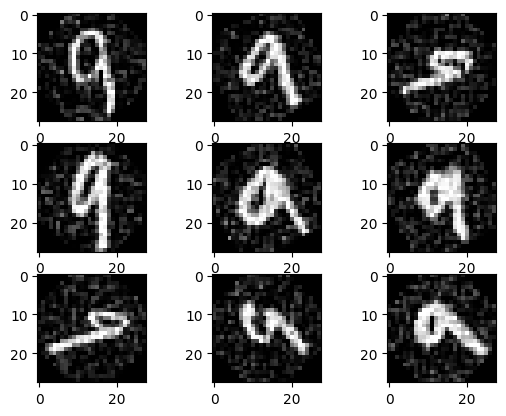

shape of X_train: (31065, 28, 28)
shape of Y_train: (31065, 10)
shape of X_test: (7767, 28, 28)

shape of X_train: (31065, 784)
shape of Y_train: (31065, 10)
shape of X_test: (7767, 784)
shape of x_train: (24852, 784)
shape of y_train: (24852, 10)
training data - percentage [0.18, 0.18, 0.14, 0.13, 0.11, 0.08, 0.07, 0.06, 0.04, 0.02]
shape of x_val: (6213, 784)
shape of y_val: (6213, 10)
validation data - percentage [0.18, 0.19, 0.14, 0.12, 0.1, 0.09, 0.07, 0.06, 0.04, 0.02]


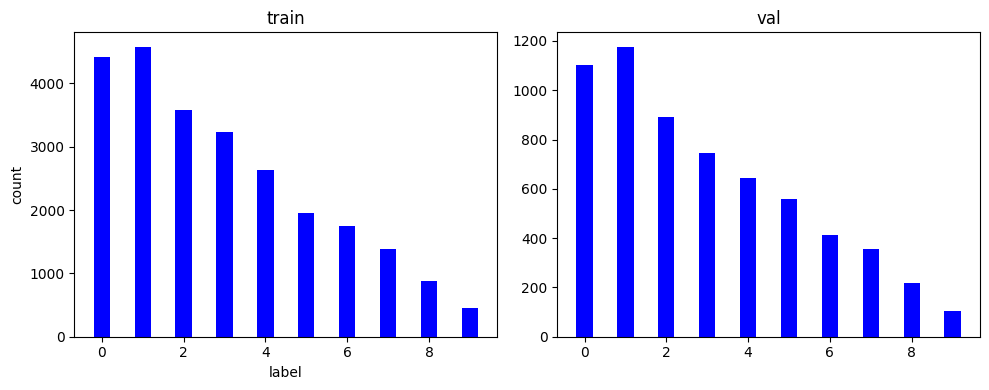

In [5]:
# X_noise_train, Y_noise_train, X_noise_test = load_data('advanced_data.npz')
# x_noise_train, y_noise_train, x_noise_val, y_noise_val = data_preprocess(X_noise_train, Y_noise_train)
# x_noise_train_cent = x_noise_train - np.mean(x_noise_train, axis=0)
# x_noise_val_cent = x_noise_val - np.mean(x_noise_train, axis=0)
# X_noise_test_cent = X_noise_test - np.mean(X_noise_test, axis=0)

In [16]:
# n_components = 200
# sparse_pca = MY_SparsePCA(n_components, 0.001, 100)
# x_train_spca = sparse_pca.fit_transform(x_noise_train_cent)
# x_val_spca = sparse_pca.transform(x_noise_val_cent)
# x_test_spca = sparse_pca.transform(X_noise_test_cent)

100%|██████████| 100/100 [00:27<00:00,  3.58it/s]


Loss after iteration 0: 28.063765
Loss after iteration 5: 8.651753
Loss after iteration 10: 6.229802
Loss after iteration 15: 5.047679
Loss after iteration 20: 4.312993
Loss after iteration 25: 3.733739
Loss after iteration 30: 3.318397
Loss after iteration 35: 2.995577
Loss after iteration 40: 2.701074
Loss after iteration 45: 2.453154
Loss after iteration 50: 2.246475
Loss after iteration 55: 2.094583
Loss after iteration 60: 1.913002
Loss after iteration 65: 1.784653
Loss after iteration 70: 1.657000
Loss after iteration 75: 1.547612
Loss after iteration 80: 1.447453
Loss after iteration 85: 1.362854
Loss after iteration 90: 1.274568
Loss after iteration 95: 1.203760


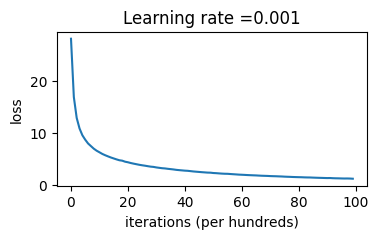

In [17]:
# adv_config = Config([n_components, 128, 10], "focal_loss")
# adv_model = Model(adv_config)
# trainer(adv_model, adv_config, x_train_spca, y_noise_train)
# adv_pred_test = predict(x_test_spca, None, adv_model)

In [18]:
# pred_val = predict(x_val_spca, y_noise_val, adv_model)

Accuracy: 88.59%
f1 score for each class: [0.89166251 0.96692776 0.87962963 0.89299868 0.89783743 0.83290488
 0.8606466  0.84061697 0.781893   0.68224299]
f1_macro score: 0.85
